In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('train.csv')

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print('Columns with missing values: ' )
print(missing_values)

Columns with missing values: 
full_name              0
registered_year       54
engine_capacity        9
insurance              5
transmission_type      0
kms_driven             3
owner_type            36
fuel_type              0
max_power             89
seats                  7
mileage              407
body_type              0
city                   0
resale_price_Lakh      0
dtype: int64


In [ ]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print('Columns with duplicate values: ')
print(duplicate_rows)

Columns with duplicate values: 
                                        full_name registered_year  \
1242             2022 Maruti Eeco CNG 5 Seater AC            2022   
1778                     2019 Jaguar XE Portfolio            2019   
2250                   2010 Hyundai i10 Magna 1.1            2010   
2265                        2011 BMW X1 sDrive20d            2011   
3028                  2016 Honda Mobilio V i-DTEC            2016   
...                                           ...             ...   
13736  2010 Volkswagen Polo Diesel Trendline 1.2L            2010   
13742   2015 Ford Ecosport 1.5 Ti VCT AT Titanium            2015   
13787                 2015 Volkswagen Polo GT TSI            2015   
13877            2020 Hyundai i20 Magna Plus BSIV            2020   
13889                     2017 Mahindra XUV500 W4            2017   

      engine_capacity              insurance transmission_type    kms_driven  \
1242          1196 cc  Third Party insurance            Man

In [10]:
# Check for model cars with missing values in the 'seats' column
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)


Distinct full names with blank seats:
2009 Maruti Estilo LXI
2019 Nissan Kicks Diesel
2008 Ford Endeavour 3.0 4x4 Thunder Plus
2010 Maruti Estilo LXI


In [35]:
#remove cc from engine_capacity
df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')


In [36]:
# Change the data types of multiple columns
df = df.astype({
    'full_name': 'string',
    'engine_capacity': float,
    'insurance': 'string',
    'transmission_type': 'string',
    'kms_driven': 'string',
    'owner_type': 'string',
    'fuel_type': 'string',
    'max_power': 'string',
    'seats': float,
    'mileage': 'string',
    'body_type': 'string',
    'city': 'string',
    'resale_price_Lakh': float
})



In [ ]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name            string[python]
registered_year              object
engine_capacity      string[python]
insurance            string[python]
transmission_type    string[python]
kms_driven           string[python]
owner_type           string[python]
fuel_type            string[python]
max_power            string[python]
seats                       float64
mileage              string[python]
body_type            string[python]
city                 string[python]
resale_price_Lakh           float64
dtype: object


In [13]:
# Update number of seats based on conditions
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI']), 'seats'] = 5
df.loc[df['full_name'] == '2008 Ford Endeavour 3.0 4x4 Thunder Plus', 'seats'] = 7

# Check
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)

Distinct full names with blank seats:


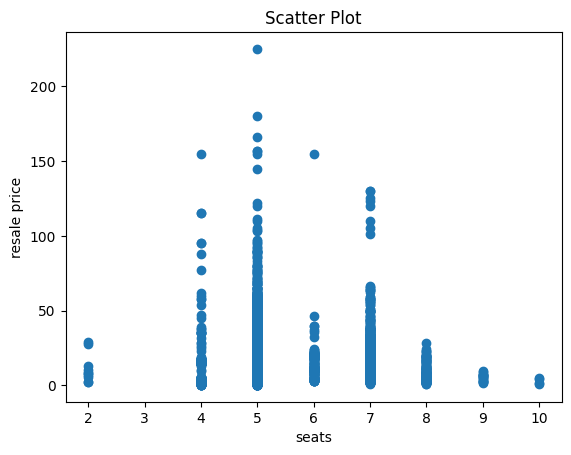

In [29]:
#Create scatter plot
plt.scatter(df['seats'], df['resale_price_Lakh'])
plt.title('Scatter Plot')
plt.xlabel('seats')
plt.ylabel('resale price')
plt.show()

In [32]:
#max min mean
min_values = df['seats'].min(), df['resale_price_Lakh'].min()
print("Min value (seats, resale price): ")
print(min_values)
max_values = df['seats'].max(), df['resale_price_Lakh'].max()
print("Max value(seats, resale price): ")
print(max_values)
mean_values = df['seats'].mean(), df['resale_price_Lakh'].mean()
print("Medium value(seats, resale price): ")
print(mean_values)

Min value (seats, resale price): 
(2.0, 0.28)
Max value(seats, resale price): 
(10.0, 225.0)
Medium value(seats, resale price): 
(5.20213528231585, 8.845202874032676)


In [39]:
#see for the minimum and maximum value of resale what is the number of seats
# min 
min_resale_index = df['resale_price_Lakh'].idxmin()
min_seats = df.loc[min_resale_index, 'engine_capacity']
min_resale_price = df['resale_price_Lakh'].min()

# max
max_resale_index = df['resale_price_Lakh'].idxmax()
max_seats = df.loc[max_resale_index, 'engine_capacity']
max_resale_price = df['resale_price_Lakh'].max()


print("Min price: ", min_resale_price, "engine_capacity: ", min_seats)
print("Max price: ", max_resale_price, "engine_capacity: ", max_seats)


Min price:  0.28 engine_capacity:  796.0
Max price:  225.0 engine_capacity:  2925.0


In [43]:

#on average what is the price based on the seats
average_price_by_seats = df.groupby('engine_capacity_group')['resale_price_Lakh'].mean()
print(average_price_by_seats)


engine_capacity_group
Grupo 1     4.862369
Grupo 2     8.187028
Grupo 3    20.232041
Grupo 4    29.984848
Grupo 5    50.481538
Grupo 6    31.656250
Grupo 7          NaN
Name: resale_price_Lakh, dtype: float64


C:\Users\letic\AppData\Local\Temp\ipykernel_14620\387526531.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_seats = df.groupby('engine_capacity_group')['resale_price_Lakh'].mean()


In [42]:
# create groups: engine_capacity

# defines the groups limit
limites = [0, 1000, 2000, 3000, 4000, 5000, 6000, float('inf')]  # Você pode ajustar os limites conforme necessário
rotulos = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5', 'Grupo 6', 'Grupo 7']

# new column'engine_capacity_group' 
df['engine_capacity_group'] = pd.cut(df['engine_capacity'], bins=limites, labels=rotulos, right=False)

print(df)


                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity              insurance transmission_type  kms_driven  \
0       

In [ ]:
mode_values = df[["full_name", "registered_year", "engine_capacity", "insurance", "transmission_type", "kms_driven", "owner_type", "fuel_type", "max_power", "seats", "mileage", "body_type", "city", "resale_price_Lakh"]].mode().iloc[0]
print(mode_values)


full_name            2016 Hyundai Grand i10 Sportz
registered_year                               2017
engine_capacity                            1197 cc
insurance                    Third Party insurance
transmission_type                           Manual
kms_driven                            1,20,000 Kms
owner_type                             First Owner
fuel_type                                   Petrol
max_power                                 81.80bhp
seats                                          5.0
mileage                                  18.9 kmpl
body_type                                Hatchback
city                                         Delhi
resale_price_Lakh                              4.5
Name: 0, dtype: object


Text(0.5, 1.0, 'Outliers seats')

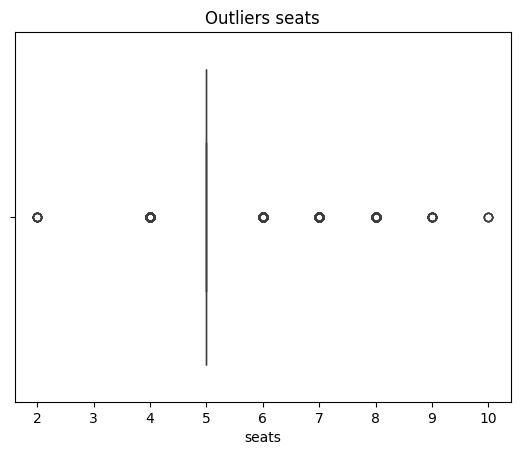

In [ ]:
#outliers seats
sns.boxplot(data=df, x=df["seats"])
plt.title("Outliers seats")

Text(0.5, 1.0, 'Outliers year')

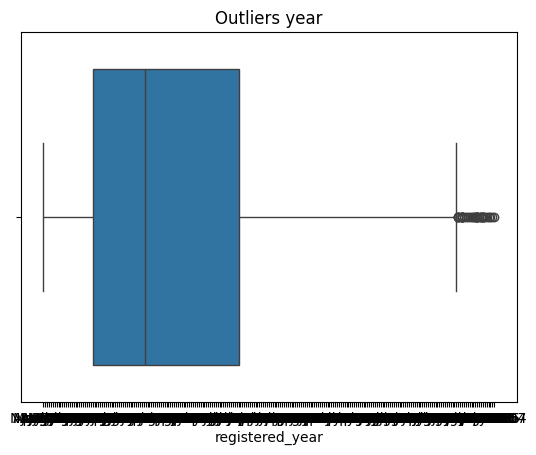

In [8]:
sns.boxplot(data=df,x=df["registered_year"])
plt.title("Outliers year")

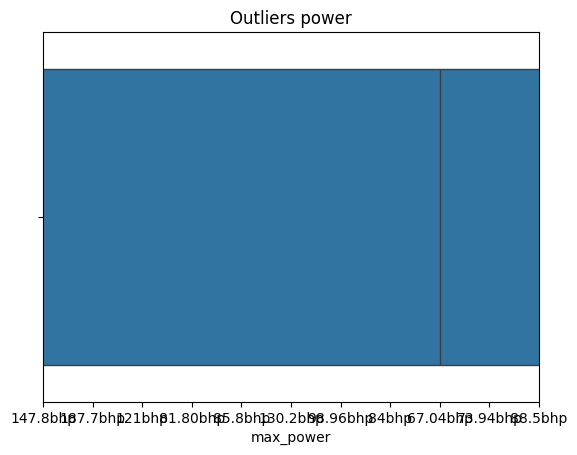

In [ ]:
# Create a box plot for the "max_power" column
ax = sns.boxplot(data=df, x=df["max_power"])
plt.title("Outliers power")

# Adjust the x-axis scale
ax.set(xlim=(60, 70))  # Replace min_value and max_value with your desired limits

# Show the plot
plt.show()

Text(0.5, 1.0, 'Outliers price')

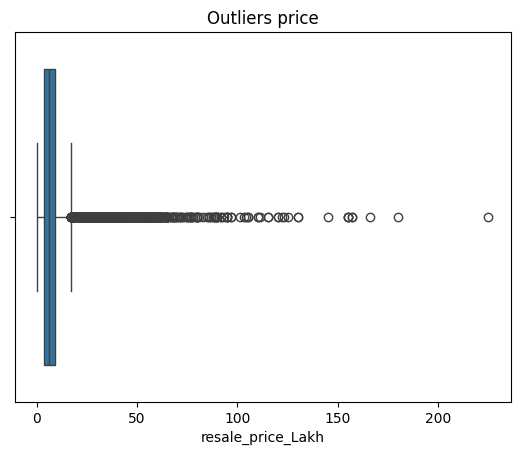

In [ ]:
sns.boxplot(data=df,x=df["resale_price_Lakh"])
plt.title("Outliers price")

In [18]:
# calculate correlation only between 'seats' and 'resale_price_Lakh' columns
correlation = df[['seats', 'resale_price_Lakh']].corr()
print(correlation)


                      seats  resale_price_Lakh
seats              1.000000           0.126669
resale_price_Lakh  0.126669           1.000000


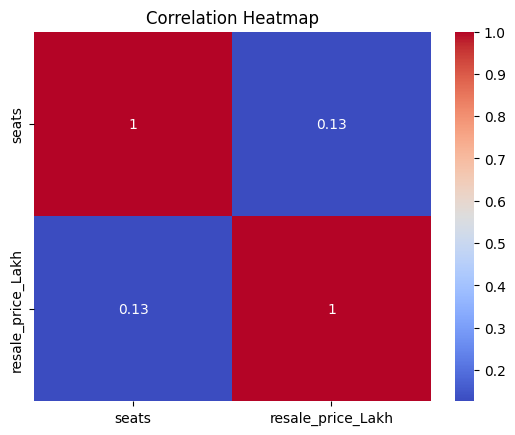

In [19]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

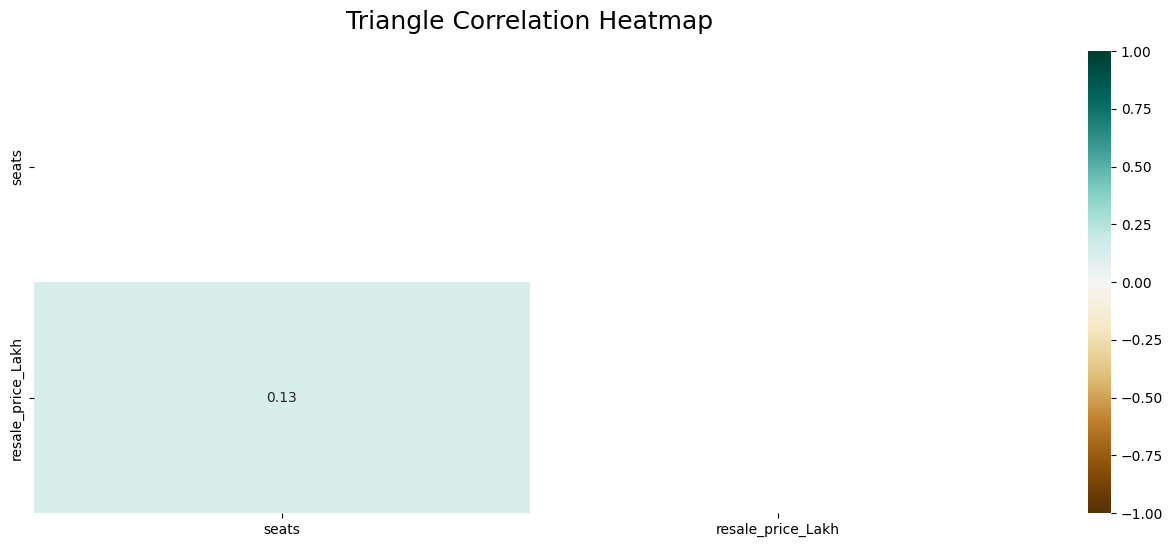

In [28]:
# Correlation triangular heatmap
# Select columns
columns_of_interest = ['seats', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(16, 6))

# Set the mask to only display the bottom half of the heatmap
mask = np.triu(np.ones_like(subset_df.corr(), dtype=bool))

# heatmap
heatmap = sns.heatmap(subset_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

plt.show()


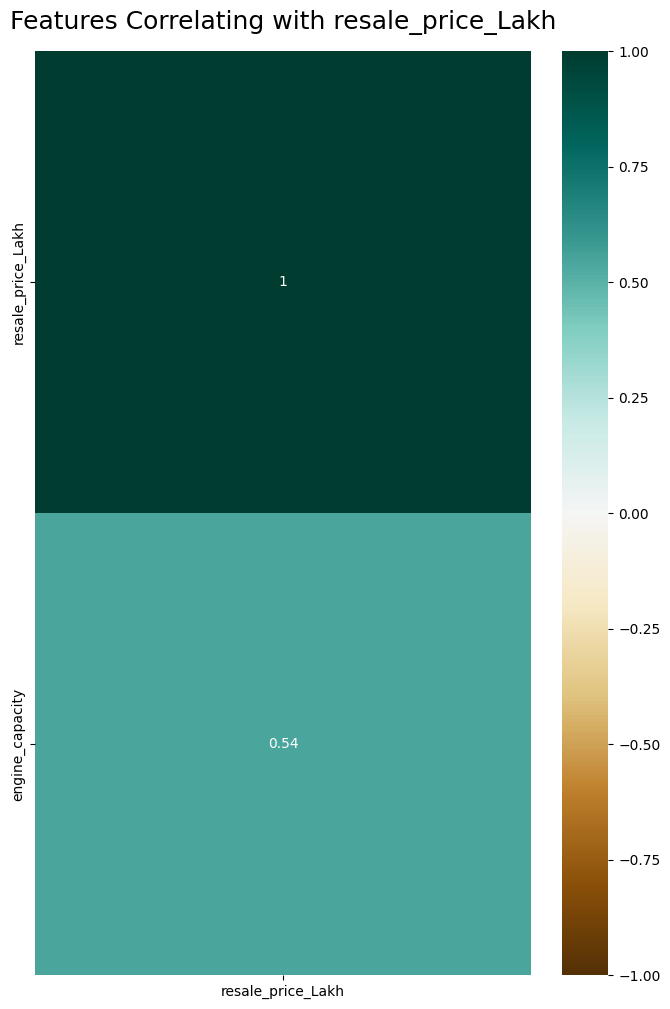

In [38]:
#correlation of all features with price

# Select columns
columns_of_interest = ['engine_capacity', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(8, 12))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 18}, pad=16)

plt.show()
